In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
with open("SeedsDataset.txt", "r") as f:
    dataset = f.readlines()

In [3]:
data = []

for line in dataset:
    row = line.strip().split("\t")
    row = [float(item) for item in row if item != '']
    data.append(row)

In [4]:
data = np.array(data)
X = data[:, :-1]

In [5]:
class kNN:
    def __init__(self, clusters = 1):
        self.clusters = clusters
        self.centroids = None
        self.centroid_idx = None
        self.assigned = None
        
    def fit(self, X, num_iters):
        self.centroid_idx = np.random.randint(X.shape[0], size = self.clusters)

        self.centroids = X[self.centroid_idx]
        
        for i in range(num_iters):
            classes = []
            assigned = self._centroid_assignment(self.clusters, self.centroids, X)
            
            for i in range(self.clusters):
                classes.append(np.where(assigned == i)[0])
                
            self.centroids = self._calculate_new_centroid(self.clusters, 
                                                     self.centroids, classes, X)
        
        self.assigned = classes
        return self.distortion(X, classes, self.centroids)

    def distortion(self, X, classes, centroids):
        dist = 0
        for i in range(self.clusters):
            dist += np.linalg.norm(X[classes[i]] - centroids[i])
        
        return dist / self.clusters
    
    def _centroid_assignment(self, num_centroids, centroids, dataset):
        distances_from_centroids = []

        for i in range(num_centroids):
            t = np.sum((dataset - centroids[i]) ** 2, axis = 1)
            distances_from_centroids.append(np.sqrt(t))

        distances_from_centroids = np.vstack(distances_from_centroids).T
        
        assignment = np.argmin(distances_from_centroids, axis = 1)

        return assignment
    
    def _calculate_new_centroid(self, num_centroids, centroids, 
                               assigned_points, dataset):
        for i in range(num_centroids):
            centroids[i] = np.mean(dataset[assigned_points[i]], axis = 0)

        return centroids

In [6]:
distortions = []
assigned_classes = []
centroids = []
for i in range(1, 8):
    k = kNN(i)

    distortions.append(k.fit(X, 20))
    assigned_classes.append(k.assigned)
    centroids.append(k.centroids)

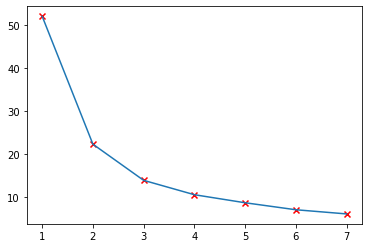

In [7]:
plt.plot(list(range(1, 8)), distortions)
plt.scatter(list(range(1, 8)), distortions, marker='x', c='r')

In [8]:
pca = PCA(2)

rx = pca.fit_transform(X)
cx = pca.fit_transform(centroids[2])

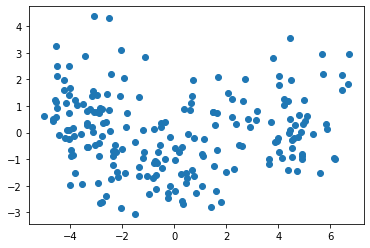

In [9]:
plt.scatter(rx[:, 0], rx[:, 1])

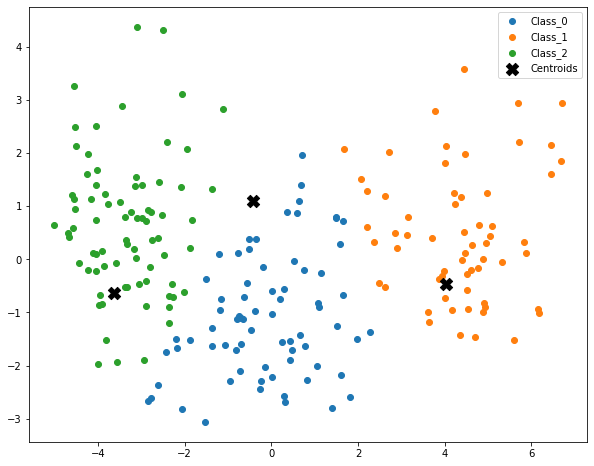

In [11]:
fig = plt.figure(figsize=(10, 8))

for i in range(len(assigned_classes[2])):
    plt.scatter(rx[assigned_classes[2][i], 0], rx[assigned_classes[2][i], 1], label = "Class_{}".format(i))
    
plt.scatter(cx[:, 0], cx[:, 1], marker='X', c = 'black', s = 150, label = "Centroids")
plt.legend(loc='upper right')